<a href="https://colab.research.google.com/github/Nela-B/Project/blob/main/ReportBISDomestic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.6 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=d5d562f434eb4f687ec84da5217df014bd52b5dd5761b76f7a3da746566c3b84
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23601 sha256=1bc351818d775d98f4d1bd241c5e196a4b51706535fbab490476b7eab3567917
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [ ]:
import pm4py
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.objects.log.importer.xes import importer as xes_importer

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Importing data
LogDomesticlD = pm4py.read_xes('DomesticDeclarations.xes')


parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

In [ ]:
LogDomesticlD

[{'attributes': {'id': 'declaration 86791', 'concept:name': 'declaration 86791', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128}, 'events': [{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'dd_declaration 86791_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'UNDEFINED'}]}, '....', {'attributes': {'id': 'declaration 138359', 'concept:name': 'declaration 138359', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 138360', 'Amount': 190.40457573396148}, 'events': [{'id': 'st_step 138363_0', 'org:resource': 'STAFF MEMBER', 'concept:name': '

In [ ]:
## Converting event log into a dataframe
LogDomesticlD = pm4py.convert_to_dataframe(LogDomesticlD)

In [ ]:
LogDomesticlD

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+01:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+01:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+01:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+01:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+01:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+01:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+01:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+01:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+01:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


In [ ]:
## Checking the number of events in each dataset
#print( len(LogRequest), len(LogDomesticlD),  len(LogInternationalD), len(LogPrepaid), len(LogPermitLog))


36796 56437 72151 18246 86581


In [ ]:
#DOMESTIC DECLARATIONS ANALYSIS

In [ ]:
## Sorting the dataset according to the timestamp
LogDomesticlD = LogDomesticlD.sort_values('time:timestamp')

In [ ]:
LogDomesticlD

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+01:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+01:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
9,st_step 86804_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 11:13:33+01:00,EMPLOYEE,declaration 86800,declaration 86800,budget 86566,declaration number 86801,320.646137
14,st_step 86733_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 11:24:20+01:00,EMPLOYEE,declaration 86731,declaration 86731,budget 86566,declaration number 86732,113.862047
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+01:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
...,...,...,...,...,...,...,...,...,...,...
10320,st_step 100725_0,STAFF MEMBER,Declaration REJECTED by ADMINISTRATION,2019-04-22 23:04:55+02:00,ADMINISTRATION,declaration 100723,declaration 100723,budget 86566,UNKNOWN,0.000000
52067,st_step 134595_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2019-06-12 11:36:41+02:00,ADMINISTRATION,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020
52068,st_step 134594_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-06-13 09:42:19+02:00,SUPERVISOR,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020
52069,dd_declaration 134592_19,SYSTEM,Request Payment,2019-06-14 08:00:23+02:00,UNDEFINED,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020


In [ ]:
LogDomesticlD.columns

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:id', 'case:concept:name', 'case:BudgetNumber',
       'case:DeclarationNumber', 'case:Amount'],
      dtype='object')

In [ ]:
LogDomesticlD = dataframe_utils.convert_timestamp_columns_in_df(LogDomesticlD)

In [ ]:
LogDomesticlD

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 08:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
9,st_step 86804_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:13:33+00:00,EMPLOYEE,declaration 86800,declaration 86800,budget 86566,declaration number 86801,320.646137
14,st_step 86733_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:24:20+00:00,EMPLOYEE,declaration 86731,declaration 86731,budget 86566,declaration number 86732,113.862047
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 10:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
...,...,...,...,...,...,...,...,...,...,...
10320,st_step 100725_0,STAFF MEMBER,Declaration REJECTED by ADMINISTRATION,2019-04-22 21:04:55+00:00,ADMINISTRATION,declaration 100723,declaration 100723,budget 86566,UNKNOWN,0.000000
52067,st_step 134595_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2019-06-12 09:36:41+00:00,ADMINISTRATION,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020
52068,st_step 134594_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-06-13 07:42:19+00:00,SUPERVISOR,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020
52069,dd_declaration 134592_19,SYSTEM,Request Payment,2019-06-14 06:00:23+00:00,UNDEFINED,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020


In [ ]:
## Filtering

In [ ]:
#LogDomesticlD = pm4py.filter_time_range(LogDomesticlD, "2018-01-01 00:00:00", "2099-01-01 00:00:00", mode='traces_contained')
filtered = pm4py.filter_time_range(LogDomesticlD, "2018-01-01 00:00:00", "2099-01-01 00:00:00", mode='traces_contained')
len(filtered)

46375

In [ ]:
## Finding the start activities
log_start = pm4py.get_start_activities(filtered)
log_start

{'Declaration SAVED by EMPLOYEE': 100,
 'Declaration SUBMITTED by EMPLOYEE': 8160}

In [ ]:
#LogDomesticlD = pm4py.filter_start_activities(LogDomesticlD, {'Declaration SUBMITTED by EMPLOYEE'})
filtered = pm4py.filter_start_activities(filtered, {'Declaration SUBMITTED by EMPLOYEE'})
len(filtered)

46275

In [ ]:
## Finding the end activities
end_activities = pm4py.get_end_activities(filtered)
end_activities

{'Declaration REJECTED by ADMINISTRATION': 5,
 'Declaration REJECTED by EMPLOYEE': 248,
 'Declaration REJECTED by SUPERVISOR': 4,
 'Payment Handled': 7903}

In [ ]:
filtered = pm4py.filter_end_activities(filtered, {'Payment Handled'})
len(filtered)

45335

In [ ]:
activities = pm4py.get_event_attribute_values(filtered, "concept:name")
activities

{'Declaration APPROVED by ADMINISTRATION': 8120,
 'Declaration APPROVED by BUDGET OWNER': 2807,
 'Declaration FINAL_APPROVED by SUPERVISOR': 7903,
 'Declaration FOR_APPROVAL by ADMINISTRATION': 1,
 'Declaration REJECTED by ADMINISTRATION': 717,
 'Declaration REJECTED by BUDGET OWNER': 45,
 'Declaration REJECTED by EMPLOYEE': 928,
 'Declaration REJECTED by SUPERVISOR': 172,
 'Declaration SUBMITTED by EMPLOYEE': 8843,
 'Payment Handled': 7903,
 'Request Payment': 7896}

In [ ]:
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', ['Declaration FOR_APPROVAL by ADMINISTRATION'], level="case", retain=False)
len(filtered)

45317

In [ ]:
activities = pm4py.get_event_attribute_values(filtered , "concept:name")
activities


{'Declaration APPROVED by ADMINISTRATION': 8117,
 'Declaration APPROVED by BUDGET OWNER': 2806,
 'Declaration FINAL_APPROVED by SUPERVISOR': 7902,
 'Declaration REJECTED by ADMINISTRATION': 716,
 'Declaration REJECTED by BUDGET OWNER': 44,
 'Declaration REJECTED by EMPLOYEE': 926,
 'Declaration REJECTED by SUPERVISOR': 171,
 'Declaration SUBMITTED by EMPLOYEE': 8838,
 'Payment Handled': 7902,
 'Request Payment': 7895}

In [ ]:
len(filtered)

45317

In [ ]:
info = filtered.groupby('case:concept:name').agg(
numActivities = ('concept:name', 'count'),\
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)


In [ ]:
info

,numActivities,duration,activities
case:concept:name,,,
declaration 100000,5,13 days 08:11:13,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100005,5,2 days 07:52:23,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100010,5,2 days 07:47:56,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100015,6,6 days 04:24:19,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100021,6,12 days 06:25:25,Declaration SUBMITTED by EMPLOYEE Declaration ...
...,...,...,...
declaration 99973,5,7 days 05:47:02,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 99978,5,7 days 04:59:03,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 99983,6,10 days 04:47:18,Declaration SUBMITTED by EMPLOYEE Declaration ...


In [ ]:
## Number of variants
info['activities'].nunique()

40

In [ ]:
info['duration'].mean()

Timedelta('11 days 14:55:04.932675272')

In [ ]:
info['duration'].median()

Timedelta('8 days 01:07:20')

In [ ]:
domesticGraph = info.groupby(info.activities.tolist(),as_index=False).size().sort_values('size',  ascending=False).reset_index()
domesticGraph

,level_0,index,size
0,9,Declaration SUBMITTED by EMPLOYEE Declaration ...,4610
1,1,Declaration SUBMITTED by EMPLOYEE Declaration ...,2466
2,23,Declaration SUBMITTED by EMPLOYEE Declaration ...,344
3,21,Declaration SUBMITTED by EMPLOYEE Declaration ...,186
4,14,Declaration SUBMITTED by EMPLOYEE Declaration ...,77
5,13,Declaration SUBMITTED by EMPLOYEE Declaration ...,49
6,31,Declaration SUBMITTED by EMPLOYEE Declaration ...,36
7,30,Declaration SUBMITTED by EMPLOYEE Declaration ...,29
8,10,Declaration SUBMITTED by EMPLOYEE Declaration ...,20
9,11,Declaration SUBMITTED by EMPLOYEE Declaration ...,14


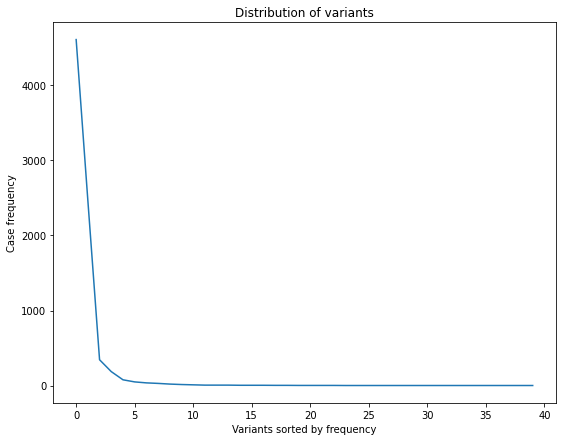

In [ ]:
fig = plt.figure(figsize = (9, 7))
plt.plot(domesticGraph["size"])
plt.xlabel('Variants sorted by frequency')
plt.ylabel('Case frequency')
plt.title("Distribution of variants")
plt.show()

In [ ]:
domesticGraph10 = domesticGraph[domesticGraph["size"] >= 10]
domesticGraph10

,level_0,index,size
0,9,Declaration SUBMITTED by EMPLOYEE Declaration ...,4610
1,1,Declaration SUBMITTED by EMPLOYEE Declaration ...,2466
2,23,Declaration SUBMITTED by EMPLOYEE Declaration ...,344
3,21,Declaration SUBMITTED by EMPLOYEE Declaration ...,186
4,14,Declaration SUBMITTED by EMPLOYEE Declaration ...,77
5,13,Declaration SUBMITTED by EMPLOYEE Declaration ...,49
6,31,Declaration SUBMITTED by EMPLOYEE Declaration ...,36
7,30,Declaration SUBMITTED by EMPLOYEE Declaration ...,29
8,10,Declaration SUBMITTED by EMPLOYEE Declaration ...,20
9,11,Declaration SUBMITTED by EMPLOYEE Declaration ...,14


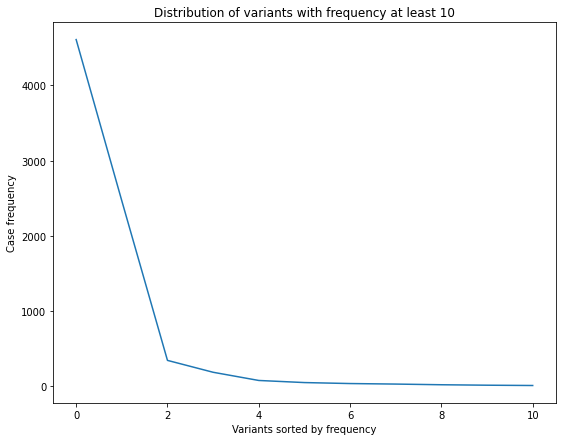

In [ ]:
fig = plt.figure(figsize = (9, 7))
plt.plot(domesticGraph10["size"])
plt.xlabel('Variants sorted by frequency')
plt.ylabel('Case frequency')
plt.title("Distribution of variants with frequency at least 10")
plt.show()

In [ ]:
print(domesticGraph["size"].sum())
print(domesticGraph10["size"].sum())

7902
7841


In [ ]:
# Number of cases in variants (that do not have frequency higher than 10)
domesticGraph["size"].sum()-domesticGraph10["size"].sum()

61

In [ ]:
len(domesticGraph10)

11

In [ ]:
variants = pm4py.get_variants(filtered)
filtered

/usr/local/lib/python3.7/dist-packages/pm4py/stats.py:219: UserWarning: pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.
  warnings.warn('pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.')


,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
10062,st_step 99091_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-06 08:41:58+00:00,EMPLOYEE,declaration 99088,declaration 99088,budget 86566,declaration number 99089,59.590569
10063,st_step 99090_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-01-06 08:42:04+00:00,ADMINISTRATION,declaration 99088,declaration 99088,budget 86566,declaration number 99089,59.590569
10068,st_step 100660_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-06 14:52:55+00:00,EMPLOYEE,declaration 100657,declaration 100657,budget 86566,declaration number 100658,70.803064
10069,st_step 100659_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-01-06 15:04:17+00:00,ADMINISTRATION,declaration 100657,declaration 100657,budget 86566,declaration number 100658,70.803064
10073,st_step 101921_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-07 14:31:13+00:00,EMPLOYEE,declaration 101917,declaration 101917,budget 86566,declaration number 101918,105.633024
...,...,...,...,...,...,...,...,...,...,...
33834,dd_declaration 126246_20,SYSTEM,Payment Handled,2019-04-18 15:31:09+00:00,UNDEFINED,declaration 126246,declaration 126246,budget 86566,declaration number 126247,32.034635
52067,st_step 134595_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2019-06-12 09:36:41+00:00,ADMINISTRATION,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020
52068,st_step 134594_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-06-13 07:42:19+00:00,SUPERVISOR,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020
52069,dd_declaration 134592_19,SYSTEM,Request Payment,2019-06-14 06:00:23+00:00,UNDEFINED,declaration 134592,declaration 134592,budget 86566,declaration number 134593,3.048020


In [ ]:
log_filtered = pm4py.convert_to_event_log(filtered)

In [ ]:
log_filtered

[{'attributes': {'id': 'declaration 99088', 'concept:name': 'declaration 99088', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 99089', 'Amount': 59.59056933117677}, 'events': [{'id': 'st_step 99091_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': Timestamp('2018-01-06 08:41:58+0000', tz='UTC'), 'org:role': 'EMPLOYEE'}, '..', {'id': 'dd_declaration 99088_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': Timestamp('2018-01-15 16:31:31+0000', tz='UTC'), 'org:role': 'UNDEFINED'}]}, '....', {'attributes': {'id': 'declaration 138359', 'concept:name': 'declaration 138359', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 138360', 'Amount': 190.40457573396148}, 'events': [{'id': 'st_step 138363_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': Timestamp('2018-12-29 16:50:14+0000', tz='UTC'), 'org:

In [ ]:
# Filtering on top 11 variants according to frequency,
filtered_log = pm4py.filter_variants_top_k(log_filtered, 11)


In [ ]:
len(filtered_log)

7841

In [ ]:
filtered = pm4py.convert_to_dataframe(filtered_log)

In [ ]:
info = filtered.groupby('case:concept:name').agg(
numActivities = ('concept:name', 'count'),\
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)

In [ ]:
print(info['duration'].mean(), info['duration'].median())

11 days 10:04:31.588062747 8 days 00:41:52


In [ ]:
BudgetOwner = info[info['activities'].str.contains('Declaration APPROVED by BUDGET OWNER')]

In [ ]:
BudgetOwner

,numActivities,duration,activities
case:concept:name,,,
declaration 100015,6,6 days 04:24:19,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100021,6,12 days 06:25:25,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100042,6,13 days 03:35:53,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100053,6,83 days 03:17:39,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100079,6,10 days 02:57:31,Declaration SUBMITTED by EMPLOYEE Declaration ...
...,...,...,...
declaration 99928,6,18 days 06:08:34,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 99949,6,12 days 04:30:11,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 99955,6,8 days 05:07:16,Declaration SUBMITTED by EMPLOYEE Declaration ...


In [ ]:
BudgetOwner['duration'].mean()

Timedelta('13 days 16:12:20.484782608')

In [ ]:
BudgetOwner['duration'].median()

Timedelta('10 days 08:01:11.500000')

In [ ]:
NotBudgetOwner = info[info['activities'].str.contains('Declaration APPROVED by BUDGET OWNER')== False]

In [ ]:
NotBudgetOwner 

,numActivities,duration,activities
case:concept:name,,,
declaration 100000,5,13 days 08:11:13,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100005,5,2 days 07:52:23,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100010,5,2 days 07:47:56,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100027,5,11 days 08:10:24,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 100032,5,7 days 05:57:03,Declaration SUBMITTED by EMPLOYEE Declaration ...
...,...,...,...
declaration 99963,5,7 days 18:57:11,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 99968,5,10 days 07:36:50,Declaration SUBMITTED by EMPLOYEE Declaration ...
declaration 99973,5,7 days 05:47:02,Declaration SUBMITTED by EMPLOYEE Declaration ...


In [ ]:
NotBudgetOwner['duration'].mean()

Timedelta('10 days 04:40:18.772682542')

In [ ]:
NotBudgetOwner['duration'].median()

Timedelta('7 days 03:03:50')

In [ ]:
case_arrival_ratio = pm4py.get_case_arrival_average(filtered_log)
case_arrival_ratio

3938.022448979592

In [ ]:
rework = pm4py.get_rework_cases_per_activity(filtered_log)
rework

{'Declaration APPROVED by ADMINISTRATION': 170,
 'Declaration APPROVED by BUDGET OWNER': 10,
 'Declaration REJECTED by ADMINISTRATION': 65,
 'Declaration REJECTED by EMPLOYEE': 65,
 'Declaration SUBMITTED by EMPLOYEE': 765}

In [ ]:
## Process Discovery

# Algorithms
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.batches import algorithm 

# Visualizations
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# Evaluation
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

from pm4py.objects.conversion.process_tree import converter as pt_converter

In [ ]:
## A directly-followed graph

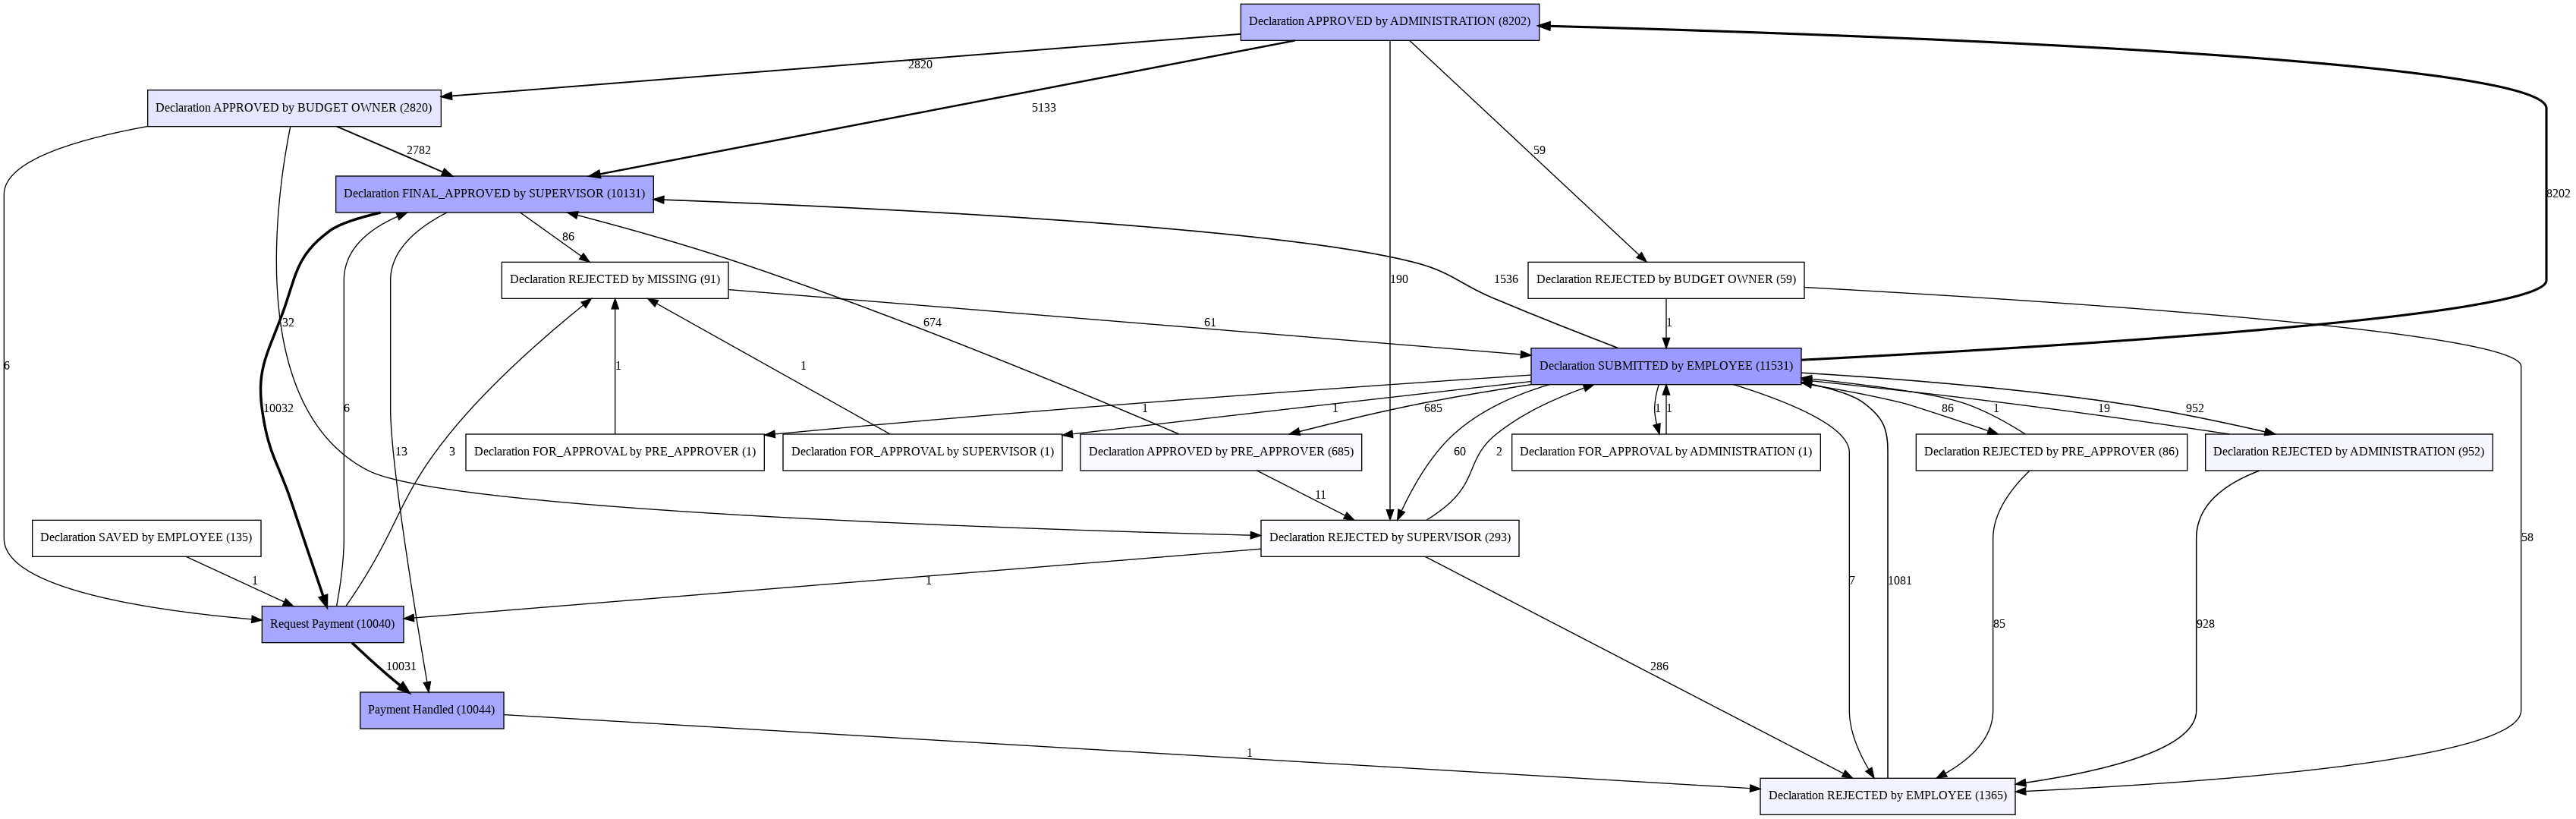

In [ ]:
dfg = dfg_discovery.apply(LogDomesticlD)
gviz = dfg_visualization.apply(dfg, log=LogDomesticlD, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

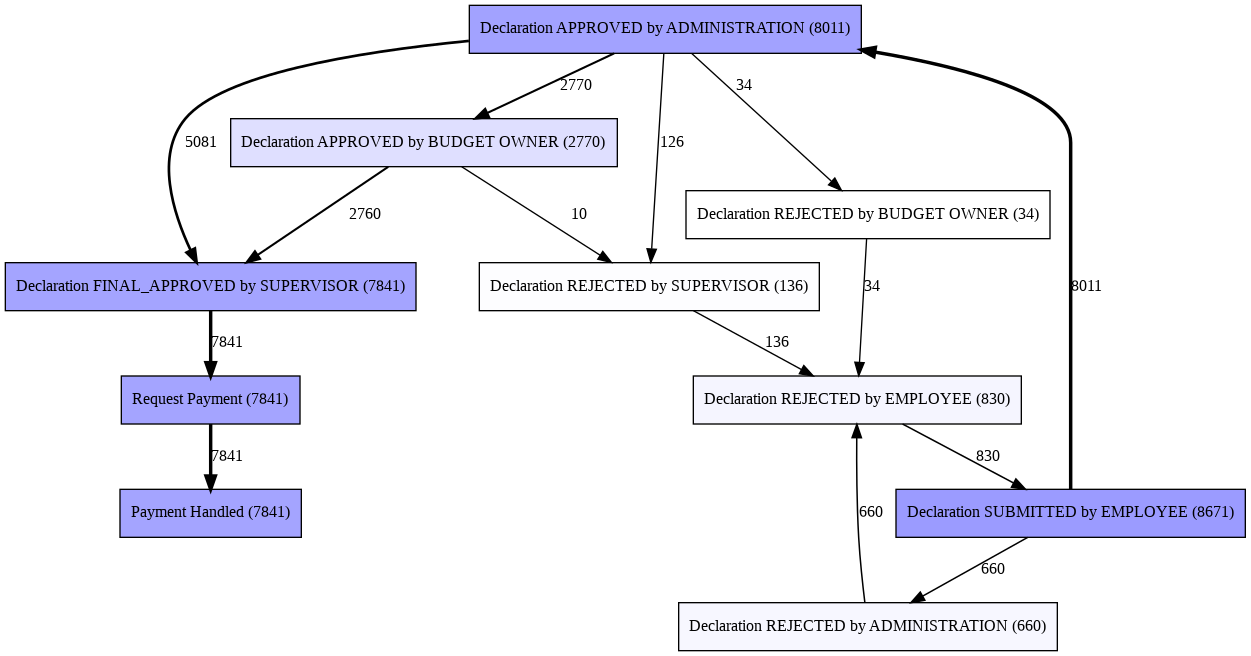

In [ ]:
dfg = dfg_discovery.apply(filtered_log)
gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


In [ ]:
#performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(filtered_log)
#pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities)

In [ ]:
## Alpha miner

replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

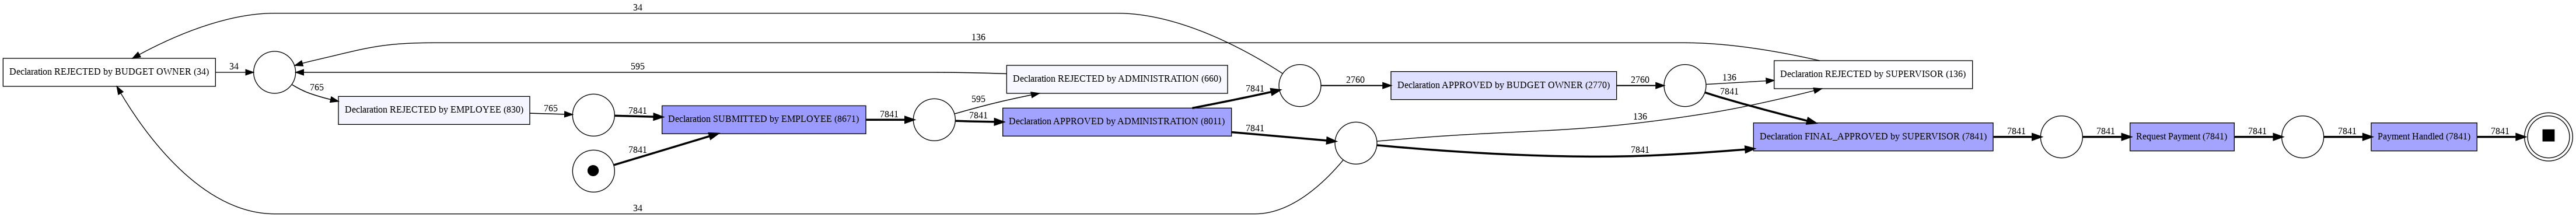

In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(filtered_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
##Evaluation

In [ ]:
alphaFitnessToken = replay_fitness_evaluator.apply(filtered_log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', alphaFitnessToken)

alphaPrec = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', alphaPrec)

alphaGen = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print('Generalization: ', alphaGen)

alphaSimpl = simplicity_evaluator.apply(net)
print('Simplicity: ', alphaSimpl)

replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8528593554105941, 'log_fitness': 0.8566222296679067, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

Precision:  1.0


replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

Generalization:  0.9594325297586115
Simplicity:  0.6666666666666666


In [ ]:
## Heuristic miner 

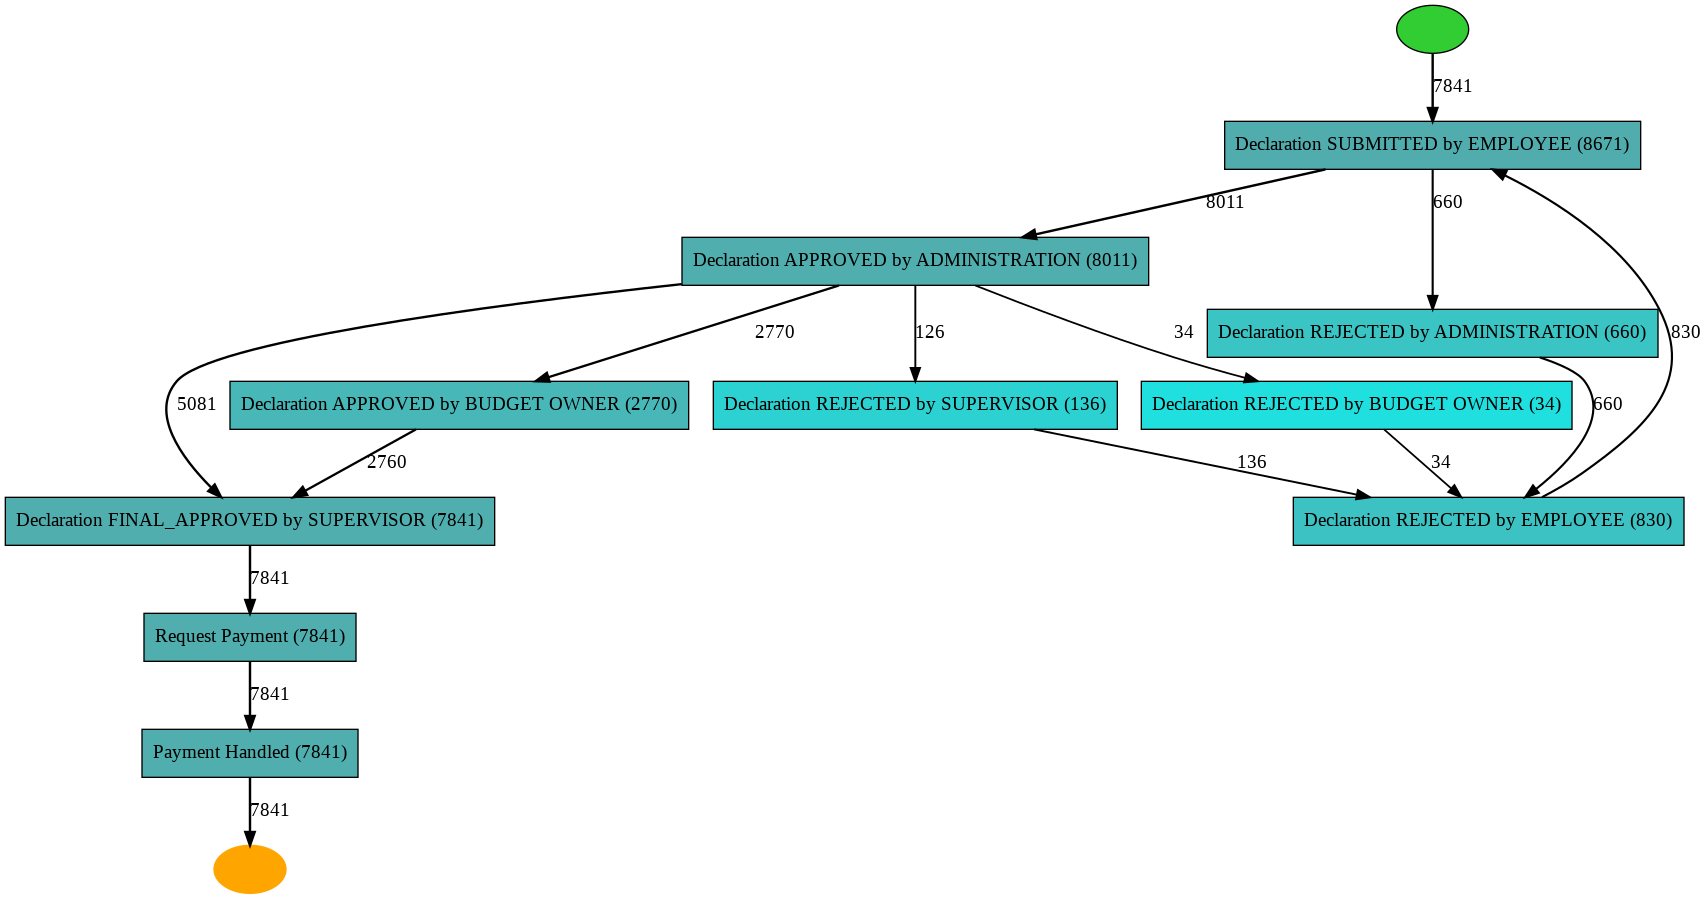

In [ ]:
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.6, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 30, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 30} 
heu_net = heuristics_miner.apply_heu(filtered_log, parameters=parameters)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


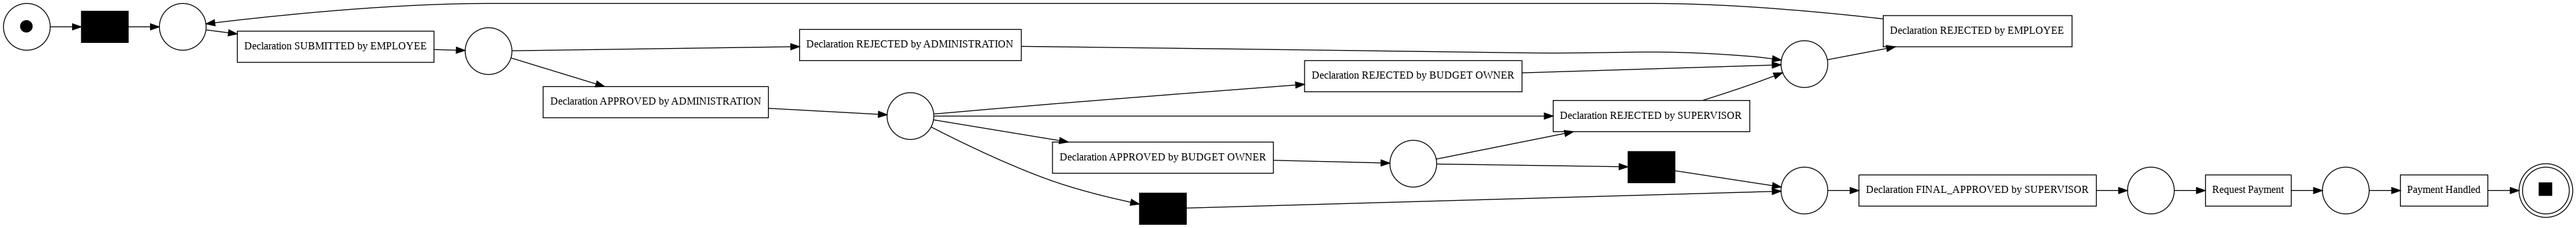

In [ ]:
#Petri Net using Heuristic Miner
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 0, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 10} 
net, initial_marking, final_marking = heuristics_miner.apply(filtered_log, parameters=parameters)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [ ]:
heuristicsFitness = replay_fitness_evaluator.apply(filtered_log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', heuristicsFitness)

heuristicsPrec = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', heuristicsPrec)

heuristicsGen = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print('Generalization: ', heuristicsGen)

heuristicsSimpl = simplicity_evaluator.apply(net)
print('Simplicity: ', heuristicsSimpl)

replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 98.26552735620457, 'average_trace_fitness': 0.9993566035206068, 'log_fitness': 0.9990043049169766, 'percentage_of_fitting_traces': 98.26552735620457}


replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

Precision:  0.9893011977367918


replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

Generalization:  0.9653821951318853
Simplicity:  0.7419354838709676


In [ ]:
## Inductive miner

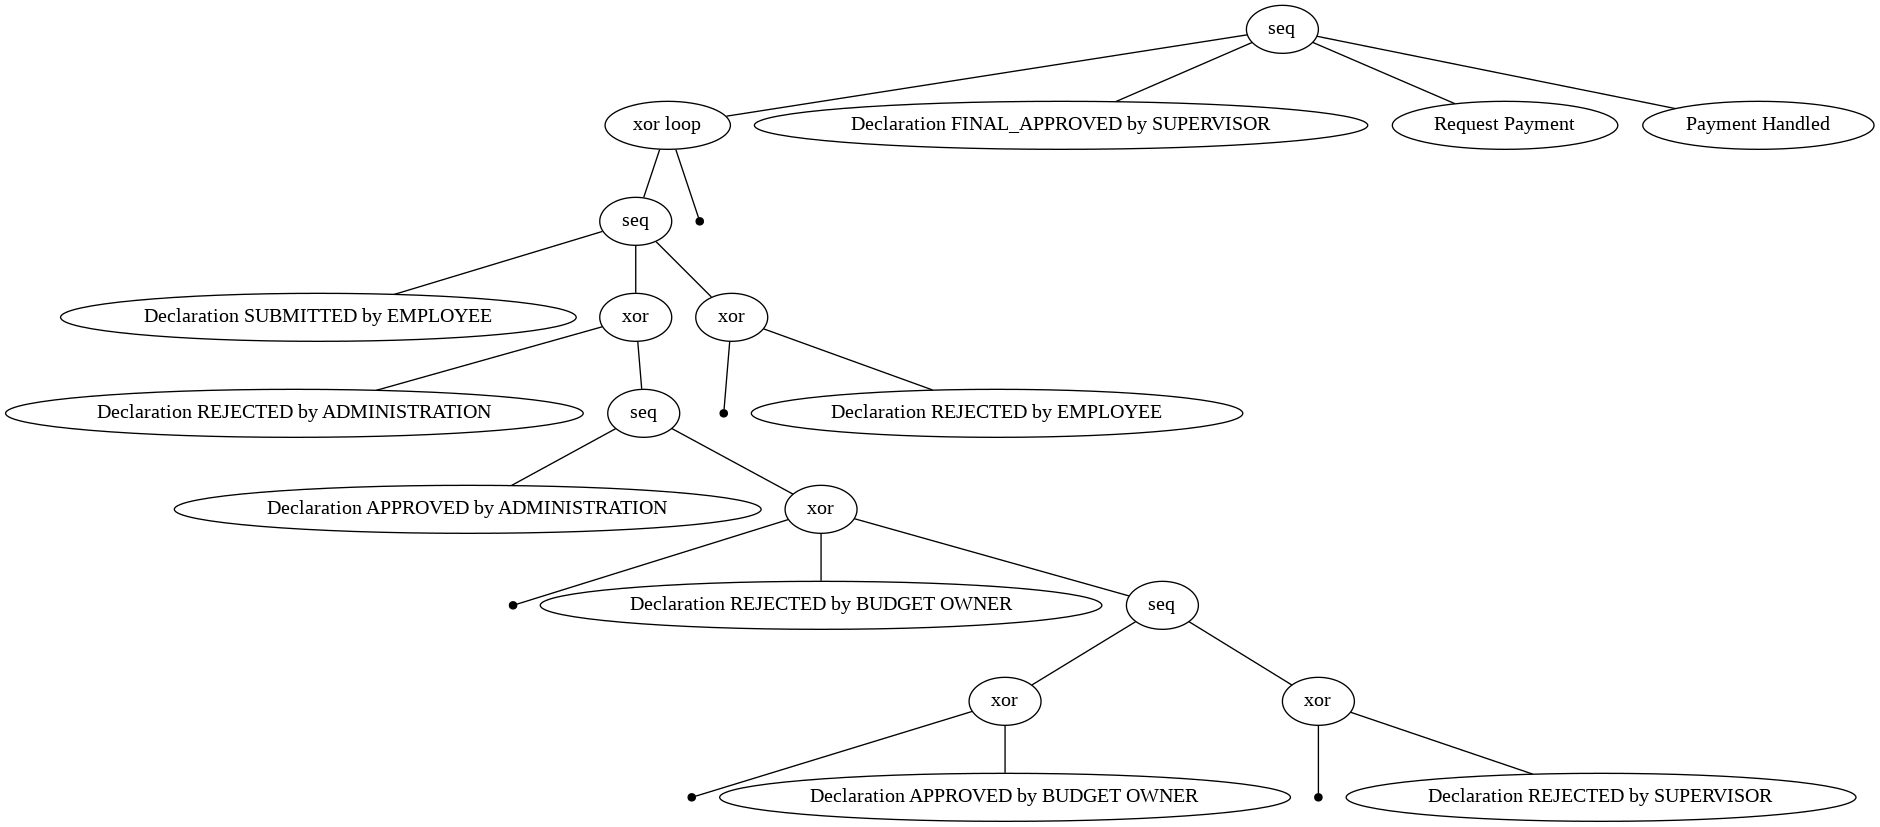

In [ ]:
tree = inductive_miner.apply_tree(filtered_log)
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

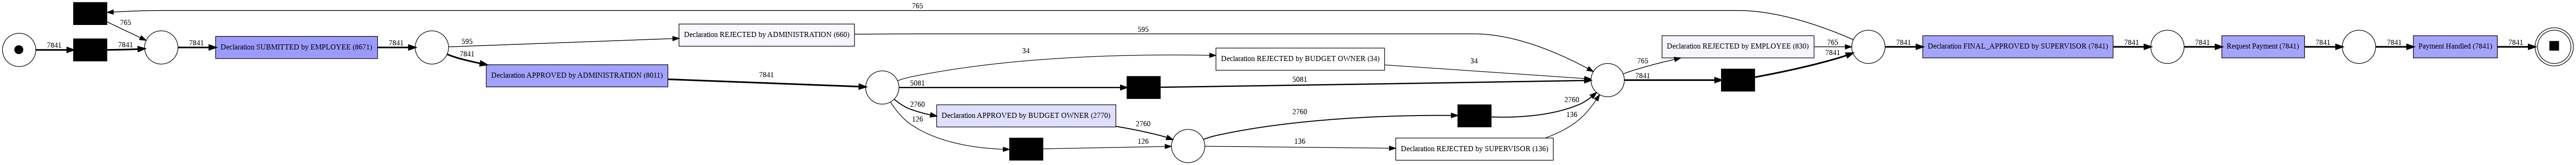

In [ ]:
net, initial_marking, final_marking  = pt_converter.apply(tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
##Evaluation

In [ ]:
inductiveFitness = replay_fitness_evaluator.apply(filtered_log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', inductiveFitness)

inductivePrec = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', inductivePrec)

inductiveGen = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print('Generalization: ', inductiveGen)

inductiveSimpl = simplicity_evaluator.apply(net)
print('Simplicity: ', inductiveSimpl)


NameError: ignored

In [ ]:
## 

In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(filtered_log)